# Comparing two predictive models using the google n-gram dataset

Hello! In this notebook we will compare two predictive models using Python and the google n-gram dataset, which looks at the frequency in which a word, or group of words appear in the stored google books, between two years. 

## Getting the data

To get the data, a python script is used that uses the same search query parameters as the google n-gram search. This script can be found at https://github.com/econpy/google-ngrams. After the script runs the query, it stores the results in a Comma-Separated-File (.csv) with the results. This file is then used to read the  results as a Pandas data frame, for an easier time with building the model. An example of running the script:

In [2]:
%run ./getngrams.py internet --startYear=1950 --endYear=2000 --corpus=eng_2012 -caseInsensitive

year,internet
1950,0.000000047462
1951,0.000000046874
1952,0.000000046293
1953,0.000000046360
1954,0.000000045076
1955,0.000000045773
1956,0.000000045137
1957,0.000000043256
1958,0.000000066491
1959,0.000000074028
1960,0.000000072810
1961,0.000000075146
1962,0.000000073383
1963,0.000000078401
1964,0.000000081605
1965,0.000000069396
1966,0.000000066206
1967,0.000000069238
1968,0.000000071483
1969,0.000000083272
1970,0.000000089286
1971,0.000000087265
1972,0.000000081992
1973,0.000000083435
1974,0.000000084542
1975,0.000000140574
1976,0.000000341908
1977,0.000000379493
1978,0.000000401578
1979,0.000000408416
1980,0.000000442134
1981,0.000000485244
1982,0.000000465024
1983,0.000000313757
1984,0.000000362234
1985,0.000000471741
1986,0.000000561896
1987,0.000000756836
1988,0.000000967559
1989,0.000001400293
1990,0.000002366081
1991,0.000004809460
1992,0.000009500314
1993,0.000015548504
1994,0.000024226602
1995,0.000033591692
1996,0.000043695195
1997,0.000054675824
1998,0.000060818845
1999,0


The script outputs the results of the query, and saves the results in a csv file. We can then take the file name the data was saved to, and use pandas to read the csv file and load it as a data frame. For example, our query was the frequency of the word Internet from the year 1970 to 2000.

In [3]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
internet_ts = pd.read_csv('internet-eng_2012-1950-2000-3-caseInsensitive.csv',
              index_col=0,
              parse_dates=True)
for col in internet_ts.columns:
    internet_ts[col] = [i*100 for i in internet_ts[col]]#Multiply by 100 to get the percentage.
internet_ts

internet
year                
1950-01-01  0.000005
1951-01-01  0.000005
1952-01-01  0.000005
1953-01-01  0.000005
1954-01-01  0.000005
1955-01-01  0.000005
1956-01-01  0.000005
1957-01-01  0.000004
1958-01-01  0.000007
1959-01-01  0.000007
1960-01-01  0.000007
1961-01-01  0.000008
1962-01-01  0.000007
1963-01-01  0.000008
1964-01-01  0.000008
1965-01-01  0.000007
1966-01-01  0.000007
1967-01-01  0.000007
1968-01-01  0.000007
1969-01-01  0.000008
1970-01-01  0.000009
1971-01-01  0.000009
1972-01-01  0.000008
1973-01-01  0.000008
1974-01-01  0.000008
1975-01-01  0.000014
1976-01-01  0.000034
1977-01-01  0.000038
1978-01-01  0.000040
1979-01-01  0.000041
1980-01-01  0.000044
1981-01-01  0.000049
1982-01-01  0.000047
1983-01-01  0.000031
1984-01-01  0.000036
1985-01-01  0.000047
1986-01-01  0.000056
1987-01-01  0.000076
1988-01-01  0.000097
1989-01-01  0.000140
1990-01-01  0.000237
1991-01-01  0.000481
1992-01-01  0.000950
1993-01-01  0.001555
1994-01-01  0.002423
1995-01-01  0.003359
1996-01-01  0.004370
1997-01-01  0.005468
1998-01-01  0.006082
1999-01-01  0.006622
2000-01-01  0.007200

Then, we can proceed to create a plot that simulates the changes of the frequency of the word over time. The pandas data frame object has a built-in function to create a plot, so we just use that.

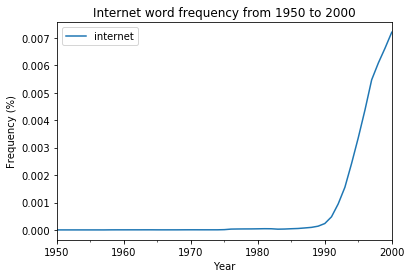

In [4]:
#Create the plot.
from matplotlib import pyplot
plot = internet_ts.plot(title= 'Internet word frequency from 1950 to 2000' )
plot.set_xlabel("Year")
plot.set_ylabel("Frequency (%)")
pyplot.show()

This plot, for example, shows the use of the word internet  in books stored in google books, from the year 1950 to the year 2000. As we can see, the popularity of the word started rising steadily in the 90's. However, based on these results, can we predict the frequency of the word from the year 2000 to 2005? For that, we will create an ARIMA model.

## ARIMA

ARIMA is an acronym that stands for:

AR = AutoRegressive (uses a dependent relationship between observations)

I = Integrated (Makes the time series stationary)

MA = Moving Average. (Uses the residual error between observation and error using a moving average.)


The parameters of the ARIMA model are defined as these:

p: The lag order, or number of lag observations.

d: The degrees of differencing.

q: The size of the range of values of the moving average.

Let's first create an Autocorrelation plot to view the lags of the time series.

In [6]:
print(type(internet_ts.index))

<class 'pandas.tseries.index.DatetimeIndex'>


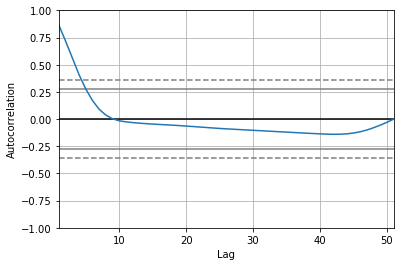

In [10]:
#Create the Autocorrelation plot.
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(internet_ts)
pyplot.show()

Running the example, we can see that there is a positive correlation with the first 5-to-7 lags that is perhaps significant for the first 2 lags.

A good starting point for the AR parameter of the model may be 2.

An ARIMA model can be created using the statsmodels library as follows:

1. Define the model with the dataset and the p d q parameters.

2. Prepare the model by calling the fit function.

3. Create the predictions by calling the predict() function.

In [267]:
import matplotlib

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(internet_ts, order=(2,1,0)) # pass the data and p,d,q parameters.
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.internet   No. Observations:                   50
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 395.458
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sun, 30 Apr 2017   AIC                           -782.916
Time:                        18:03:58   BIC                           -775.268
Sample:                    01-01-1951   HQIC                          -780.003
                         - 01-01-2000                                         
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                0.0002      0.000      1.112      0.272        -0.000     0.001
ar.L1.D.internet     1.2658      0.131      9.651      0.000         1.009     1.523
ar.L2.D.internet    -0.3278 

Now we proceed to plot the residual errors of the model.

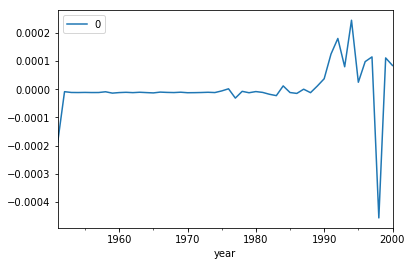

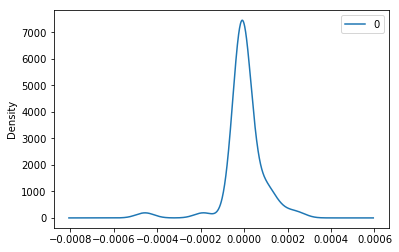

               0
count  50.000000
mean    0.000001
std     0.000091
min    -0.000456
25%    -0.000012
50%    -0.000011
75%     0.000001
max     0.000244


In [268]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())#Summary statistics.

The first plot is the  ARMA Fit Residual Error Line Plot. This is the residual error while trying to fit the time series.  Since the internet had a huge boom in the 90s, the residual error is greater when reaching that point. 

The second plot is the ARMA Fit Residual Error Density Plot, which is the density of the values of the errors while fitting the model.

Finally there's the summary statistics. Since the mean of the residuals is very close to 0, there is no bias in the prediction.

## Testing the model

First, we create  the testing values, using the script again. This time to search for the values in books from the year 2000 to 2005

In [269]:
%run ./getngrams.py internet --startYear=2000 --endYear=2005 --corpus=eng_2012 -caseInsensitive

year,internet
2000,0.000092391370
2001,0.000089385250
2002,0.000086690268
2003,0.000086690268
2004,0.000087208376
2005,0.000085107239
Data saved to internet-eng_2012-2000-2005-3-caseInsensitive.csv


In [270]:
test_ts = pd.read_csv('internet-eng_2012-2000-2005-3-caseInsensitive.csv',
              index_col=0,
              parse_dates=True)
for col in test_ts.columns:
    test_ts[col] = [i*100 for i in test_ts[col]]
test_ts

internet
year                
2000-01-01  0.009239
2001-01-01  0.008939
2002-01-01  0.008669
2003-01-01  0.008669
2004-01-01  0.008721
2005-01-01  0.008511

Now that we have loaded the real values for the word, we create predictions and compare them to the real value.

predicted=0.007766, expected=0.009239
predicted=0.011714, expected=0.008939
predicted=0.010733, expected=0.008669
predicted=0.008548, expected=0.008669
predicted=0.008668, expected=0.008721
predicted=0.008799, expected=0.008511
Test MSE: 0.00000237


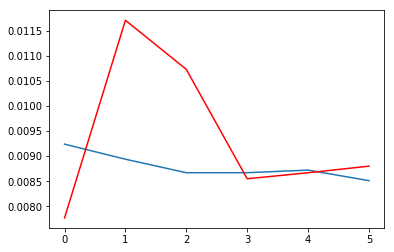

In [271]:
from sklearn.metrics import mean_squared_error
#Recreate original data.
internet_ts = pd.read_csv('internet-eng_2012-1950-2000-3-caseInsensitive.csv',
              index_col=0,
              parse_dates=True)
for col in internet_ts.columns:
    internet_ts[col] = [i*100 for i in internet_ts[col]]
    

#Take only the values from both data frames.
internet_ts=internet_ts.values
test_ts= test_ts.values

#Create a list for the value of each year in the original data and an empty list for the predictions.
historical_data = [year for year in internet_ts]
predictions = list()


for t in range(len(internet_ts)):
    #Create the model.
    model = ARIMA(historical_data, order=(2,1,0))
    model_fit = model.fit(disp=0)
    #Create the forecast.
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    #Compare predicted values with real ones.
    obs = test_ts[t]
    historical_data.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

#Print the mean squared error (performance)
error = mean_squared_error(test_ts, predictions)
print('Test MSE: %.8f' % error)

# Plot the time series.
pyplot.plot(test_ts)
pyplot.plot(predictions, color='red')
pyplot.show()

Now that we have both the real value and the prediction, let's reason. The model, up to the year 2000, started seeing only increases in the usage of the word internet. But, unexpectedly, the use of the word started going down after the year 2000. Thus, it overshot the prediction. After it realizes this however, the model starts predicting lower values, and in 2003, the prediction created by the Time Seriesm model matches the real values.

The mean squared error of the model was 0.00000222 which is pretty good, even though the plot shows a drastic change. The model learns well through time, and adapts decently enough. Overall, it's a decent model.

## Linear Regression

Now, onto the second predictive model, Linear Regression.

In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. 

Given a dataset of n-1 features and a feature to predict y, linear regression assumes the relationship between them as linear. Thus, it creates a linear equation of the form:

y = Xa + b

Where X is a matrix with the values of the features, a is a vector of weights (called theta), b is the residual error and y is the label to predict.

Unlike the Time Series prediction, linear regression doesn't work well with dates. This is because each date is an unique value, and an ordinal feature, and thus not a numeric continous variable. To solve this, we will expand the search query with two words: computer and web.

In [272]:
%run ./getngrams.py internet,computer,web --startYear=1950 --endYear=2000 --corpus=eng_2012 -caseInsensitive

year,computer,internet,web
1950,0.000002289730,0.000000047462,0.000006298716
1951,0.000002308152,0.000000046874,0.000006342939
1952,0.000003244543,0.000000046293,0.000006280614
1953,0.000004614332,0.000000046360,0.000006304197
1954,0.000006515745,0.000000045076,0.000006469019
1955,0.000007669095,0.000000045773,0.000006574494
1956,0.000008935243,0.000000045137,0.000006452709
1957,0.000011268052,0.000000043256,0.000006352251
1958,0.000014113286,0.000000066491,0.000006226984
1959,0.000016595824,0.000000074028,0.000006115901
1960,0.000018797653,0.000000072810,0.000005980184
1961,0.000020535701,0.000000075146,0.000005733659
1962,0.000024591585,0.000000073383,0.000005832578
1963,0.000028965007,0.000000078401,0.000005725107
1964,0.000033254220,0.000000081605,0.000005776839
1965,0.000037893276,0.000000069396,0.000005939124
1966,0.000042063547,0.000000066206,0.000005969937
1967,0.000047081919,0.000000069238,0.000005938177
1968,0.000052667170,0.000000071483,0.000005957415
1969,0.000056988960,0.0

After this we load the dataset and  visualize it.

In [273]:
internet_lr = pd.read_csv('internet_computer_web-eng_2012-1950-2000-3-caseInsensitive.csv',
              index_col=0,
              parse_dates=True)
for col in internet_lr.columns:
    internet_lr[col] = [i*100 for i in internet_lr[col]]
internet_lr

computer  internet       web
year                                    
1950-01-01  0.000229  0.000005  0.000630
1951-01-01  0.000231  0.000005  0.000634
1952-01-01  0.000324  0.000005  0.000628
1953-01-01  0.000461  0.000005  0.000630
1954-01-01  0.000652  0.000005  0.000647
1955-01-01  0.000767  0.000005  0.000657
1956-01-01  0.000894  0.000005  0.000645
1957-01-01  0.001127  0.000004  0.000635
1958-01-01  0.001411  0.000007  0.000623
1959-01-01  0.001660  0.000007  0.000612
1960-01-01  0.001880  0.000007  0.000598
1961-01-01  0.002054  0.000008  0.000573
1962-01-01  0.002459  0.000007  0.000583
1963-01-01  0.002897  0.000008  0.000573
1964-01-01  0.003325  0.000008  0.000578
1965-01-01  0.003789  0.000007  0.000594
1966-01-01  0.004206  0.000007  0.000597
1967-01-01  0.004708  0.000007  0.000594
1968-01-01  0.005267  0.000007  0.000596
1969-01-01  0.005699  0.000008  0.000590
1970-01-01  0.006071  0.000009  0.000613
1971-01-01  0.006302  0.000009  0.000615
1972-01-01  0.006572  0.000008  0.000604
1973-01-01  0.006816  0.000008  0.000609
1974-01-01  0.006992  0.000008  0.000625
1975-01-01  0.007103  0.000014  0.000627
1976-01-01  0.007316  0.000034  0.000644
1977-01-01  0.007519  0.000038  0.000646
1978-01-01  0.007920  0.000040  0.000640
1979-01-01  0.008400  0.000041  0.000649
1980-01-01  0.009172  0.000044  0.000665
1981-01-01  0.010279  0.000049  0.000673
1982-01-01  0.011399  0.000047  0.000677
1983-01-01  0.012341  0.000031  0.000676
1984-01-01  0.013173  0.000036  0.000684
1985-01-01  0.013826  0.000047  0.000697
1986-01-01  0.014173  0.000056  0.000700
1987-01-01  0.014347  0.000076  0.000722
1988-01-01  0.014022  0.000097  0.000735
1989-01-01  0.013796  0.000140  0.000758
1990-01-01  0.013505  0.000237  0.000783
1991-01-01  0.013366  0.000481  0.000831
1992-01-01  0.013285  0.000950  0.001104
1993-01-01  0.013198  0.001555  0.001708
1994-01-01  0.013139  0.002423  0.002699
1995-01-01  0.013120  0.003359  0.003744
1996-01-01  0.013024  0.004370  0.005085
1997-01-01  0.012984  0.005468  0.006414
1998-01-01  0.012943  0.006082  0.007305
1999-01-01  0.012863  0.006622  0.008241
2000-01-01  0.012943  0.007200  0.009071

Again, let's plot the words over time.

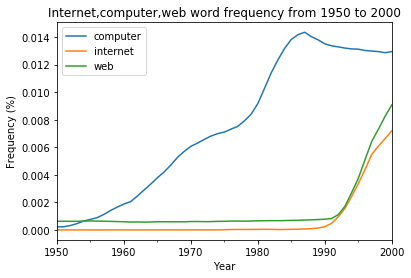

In [274]:
#Create the plot.
internet_lrplot = internet_lr.plot(title= 'Internet,computer,web word frequency from 1950 to 2000' )
internet_lrplot.set_xlabel("Year")
internet_lrplot.set_ylabel("Frequency (%)")
internet_lrplot

Pretty similar to the previous model. Now let's go right ahead to predicting and comparing.

We will first get the test data, for the years 2000 to 2005.

In [275]:
%run ./getngrams.py internet,computer,web --startYear=2000 --endYear=2005 --corpus=eng_2012 -caseInsensitive

year,computer,internet,web
2000,0.000127130087,0.000092391370,0.000129963091
2001,0.000124223349,0.000089385250,0.000126819723
2002,0.000121663975,0.000086690268,0.000123505002
2003,0.000121663975,0.000086690268,0.000123505002
2004,0.000120993899,0.000087208376,0.000127802082
2005,0.000119293368,0.000085107239,0.000127493075
Data saved to internet_computer_web-eng_2012-2000-2005-3-caseInsensitive.csv


In [276]:
test_lr = pd.read_csv('internet_computer_web-eng_2012-2000-2005-3-caseInsensitive.csv',
              index_col=0,         
              parse_dates=True)
for col in test_lr .columns:
    test_lr[col] = [i*100 for i in test_lr[col]]
test_lr

computer  internet       web
year                                    
2000-01-01  0.012713  0.009239  0.012996
2001-01-01  0.012422  0.008939  0.012682
2002-01-01  0.012166  0.008669  0.012351
2003-01-01  0.012166  0.008669  0.012351
2004-01-01  0.012099  0.008721  0.012780
2005-01-01  0.011929  0.008511  0.012749

And now, we create the prediction.

In [277]:
#Create a copy for plotting later.
test_copy = test_lr.copy()


from sklearn import linear_model
#Create the linear regression model.
regressor = linear_model.LinearRegression()

#Label to predict
y = internet_lr.internet

#Training features
X= internet_lr[['computer','web']]

#Train the model.
regressor.fit(X, y)

#Get and print the error of the model.
error = mean_squared_error(test_lr.internet, regressor.predict(test_lr[['computer','web']]))
print('Test MSE: %.8f' % error)

#Replace the original value with the predicted value.
test_lr['internet'] = regressor.predict(test_lr[['computer','web']])
print(test_lr)


Test MSE: 0.00000397
            computer  internet       web
year                                    
2000-01-01  0.012713  0.011085  0.012996
2001-01-01  0.012422  0.010804  0.012682
2002-01-01  0.012166  0.010507  0.012351
2003-01-01  0.012166  0.010507  0.012351
2004-01-01  0.012099  0.010886  0.012780
2005-01-01  0.011929  0.010857  0.012749


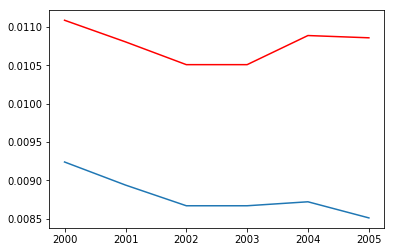

In [278]:
#Plot the difference between the real value and the predicted one.
pyplot.plot(test_copy.internet)
pyplot.plot(test_lr.internet, color='red')
pyplot.show()

As we can see, the linear regression model performs worse than the time series ARIMA model for this particular set of data. The mean squared error is 0.00000397 much worse than the ARIMA model. Still, the values are off by 0.000004% on average, and we have seen before this data is tricky. For this particular type of data_set, we can see that time series performs better.

## Comparison between the models.

For the ARIMA model:

1. Needed just dates and the feature to predict. It doesn't take more features than that, so only the value to predict and a set of dates is needed.

2. Had a mean squared error of 0.00000222, a decent value for the range of values of the data set.

3. Started predicting better over time. It fitted the real values for the later years.

For the Linear Regression model:

1. Can't use the dates to predict, as they'll throw off the prediction. Needed more features than just the label to predict, so took more than one.

2. Had a mean squared error of 0.00000397, worse than the time series model.

3. Prediction remained the same over time, so it wouldn't catch up with the real values.

The difference of error between the two models was 0.00000175, so Linear Regression almost doubles ARIMA in the error values. 

In conclusion, for this particular dataset and type of problem, the time series ARIMA model performed much better than linear regression. 